<a href="https://colab.research.google.com/github/tvelichkovt/TensorFlow/blob/master/TF_005_Shallow_Neural_Network2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf -> "import"

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('TensorFlow ver is:', tf.__version__, '\nKeras ver is:', keras.__version__, '\nPandas ver is:', pd.__version__, '\nNumpy ver is:', np.__version__)

TensorFlow ver is: 2.2.0 
Keras ver is: 2.3.0-tf 
Pandas ver is: 1.0.5 
Numpy ver is: 1.18.5


In [2]:
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split

# tf -> "Shallow Neural network -> random seed for reproducibility"

In [ ]:
seed = 7
np.random.seed(seed)

# tf -> "Shallow Neural network -> generate two sets of data"

In [4]:
def spirals(points, noise=.5):
    n = np.sqrt(np.random.rand(points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(points),np.ones(points))))


X, y = spirals(1000)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(2000, 2)
(2000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# tf -> "Shallow Neural network -> spliting data into train and test"

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# tf -> "Shallow Neural network -> data visualization"

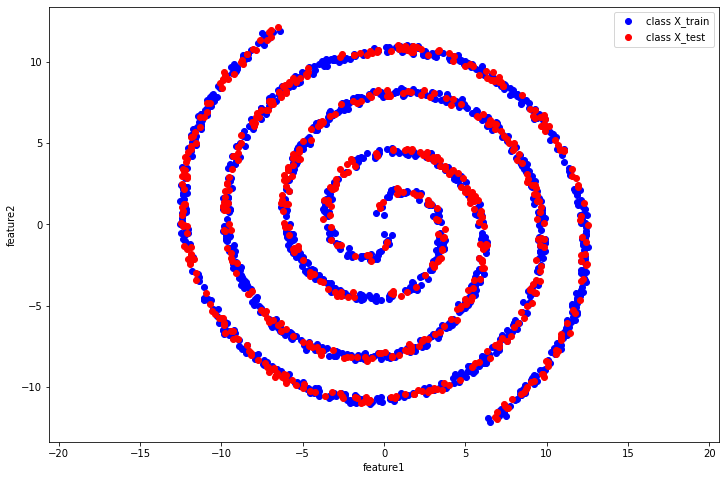

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

# tf -> "Shallow Neural network -> checking the shape of the input data"

In [7]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1340, 2)
y_train:	(1340,)
x_test:		(660, 2)
y_test:		(660,)


# tf -> "Shallow Neural network -> hyperparameters"

In [8]:
# Hyperparameters
training_epochs = 300 # Total number of training epochs
learning_rate = 0.001 # The learning rate

# tf -> "Shallow Neural network -> creating a model"

In [9]:
# create a model
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(12, input_dim=2, activation='relu'))
    model.add(tf.keras.layers.Dense(12,activation='relu'))
    model.add(tf.keras.layers.Dense(12,activation='relu'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate),
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                36        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


# tf -> "Shallow Neural network -> train the model"

In [10]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 validation_data = (X_test, y_test.T),
 verbose = 0
)

# tf -> "Shallow Neural network -> test the model"

In [12]:
prediction_values = model.predict_classes(X_test)
print("Prediction values shape:", prediction_values.shape)

Prediction values shape: (660, 1)


# tf -> "Shallow Neural network -> accuracy"

In [13]:
print(np.mean(results.history["val_accuracy"]))

0.7934848497311274


# tf -> "Shallow Neural network -> evaluate the model to see the accuracy"

In [14]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0020, accuracy: 100.0000%
Evaluating on testing set...
loss=0.0019, accuracy: 100.0000%


# tf -> "Shallow Neural network -> summarize history for accuracy"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'down right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


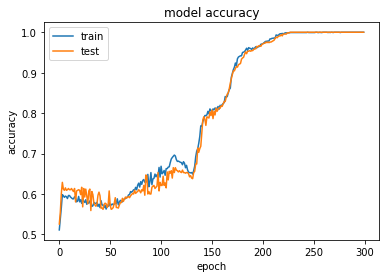

In [15]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

# tf -> "Shallow Neural network -> summarize history for loss"

Maximum Loss : 1.2298

Minimum Loss : 0.0021

Loss difference : 1.2276


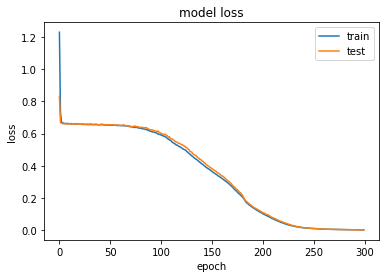

In [16]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# tf -> "Shallow Neural network -> visualization of the model predictions on our test set"

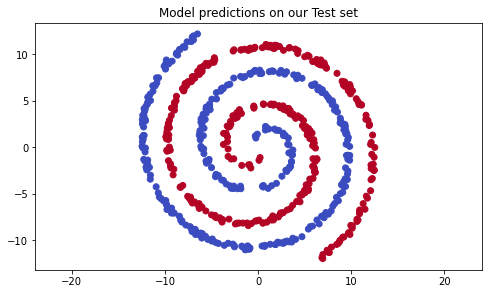

In [17]:
plt.figure(figsize =(8,10))
plt.subplot(212)
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

# tf -> "Shallow Neural network -> how our model separates the classes"

Text(0.5, 1.0, 'Model predictions on our Test set')

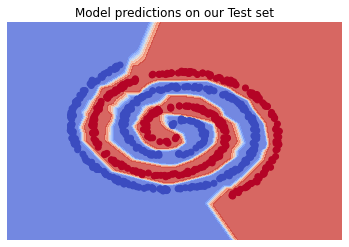

In [18]:
xx = np.linspace(-20, 20, 400)
yy = np.linspace(-20, 20, 400)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-20, 20])
axes.set_ylim([-20, 20])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')